In [ ]:
#Выполните задание по ссылке и оформите в виде CRISP-DM подхода.
#1. Business Understanding
#Бизнес-фон и бизнес-цель.
#В данном случае имеется набор данных по харрактеристикам вин и их субъективная оценка качества по 10-тибальной шкале.
#Задача в прогнозе оценки качества для новых вин.
#Критерии успеха с точки зрения бизнеса - например если потребитель продукта Рестораны, то - минимизация затрат
#на получение состава винной карты с наименьшей стоимостью и наилучшим качеством
#По результамтам каждого сезона/года необходимо получать откуда то новые оценки по новым вышедшим сортам Вин
#и переобучать модель с учетом новых вин
#Цели DS - получить модель, позволяющую по входным параметрам получить оценку качества Вина
#Критерии успеха DS - точность прогноза на уровне 90%
#План проекта:
# - Получение данных по ссылке
# - Устранение пропущенных данных
# - Подготовка данных - разбивка на тренировочное и тестовое множество.
# - Выбор модели для тренировки
# - Обучение и тестирование модели
# - В случае недостаточного качества - замена модели и повторное обучение и тестирование
# - В случае успеха - интеграция модели в бизнес процесс оценки качества Вина при составлении винной карты


Доп задание под *

In [2]:
!pip install kaggle

In [5]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json
api_token = {"username":"name","key":"key"}
import json
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
!kaggle datasets download -d rajyellow46/wine-quality/

100% 98.0k/98.0k [00:00<00:00, 360kB/s]
100% 98.0k/98.0k [00:00<00:00, 360kB/s]


In [7]:
!unzip /content/wine-quality.zip

Archive:  /content/wine-quality.zip
  inflating: winequalityN.csv        


In [9]:
import pandas as pd
data = pd.read_csv("/content/winequalityN.csv")

In [10]:
#2. Data Uderstanding
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [11]:
#Возможно есть выбросы в параметрах residual sugar, free sulfur dioxide и total sulfur dioxide и их следует вычистить.
#Но я не являюсь экспертов в вопросе Вин, поэтому сперва нужно пообщаться с экспертом предметной области

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [12]:
#Почти все данные заполнены, поэтому нулевыми можно принебречь и вычистить
#3. Data Preparation
data = data.dropna(how ='any')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6463 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6463 non-null   object 
 1   fixed acidity         6463 non-null   float64
 2   volatile acidity      6463 non-null   float64
 3   citric acid           6463 non-null   float64
 4   residual sugar        6463 non-null   float64
 5   chlorides             6463 non-null   float64
 6   free sulfur dioxide   6463 non-null   float64
 7   total sulfur dioxide  6463 non-null   float64
 8   density               6463 non-null   float64
 9   pH                    6463 non-null   float64
 10  sulphates             6463 non-null   float64
 11  alcohol               6463 non-null   float64
 12  quality               6463 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 706.9+ KB


In [15]:
#Сохраняем вычищенные данные, чтобы не возвращаться к предыдущим шагам
data.to_csv('cleared_data.csv', index=False)

In [25]:
import pandas as pd
data = pd.read_csv("/content/cleared_data.csv")
from sklearn.model_selection import train_test_split
X = data.drop(columns='quality')
#Меняем категориальные признаки на колонки с бинарным значанием
X = pd.get_dummies(X.loc[:], columns=['type'])
X = X.drop(columns='type_red')
Y = data['quality']

#Делим на тренировочное и тестовое множества
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [26]:
#4. Modeling
#Пробуем логистическую регрессию
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict_proba(X_test)
model.score(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.46558391337973704

In [27]:
#Результат не очень, поэтому попробуем RandomForest
from sklearn import ensemble
RF = ensemble.RandomForestClassifier()
RF.fit(X_train, Y_train)
RFpredict = RF.predict(X_test)
from sklearn import metrics as mtr
print (RF.score(X_test, Y_test))
print(mtr.classification_report(Y_test, RFpredict))

0.6844547563805105
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       1.00      0.13      0.23        39
           5       0.72      0.75      0.73       416
           6       0.66      0.77      0.71       588
           7       0.70      0.51      0.59       216
           8       1.00      0.30      0.46        27

    accuracy                           0.68      1293
   macro avg       0.68      0.41      0.45      1293
weighted avg       0.70      0.68      0.67      1293



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


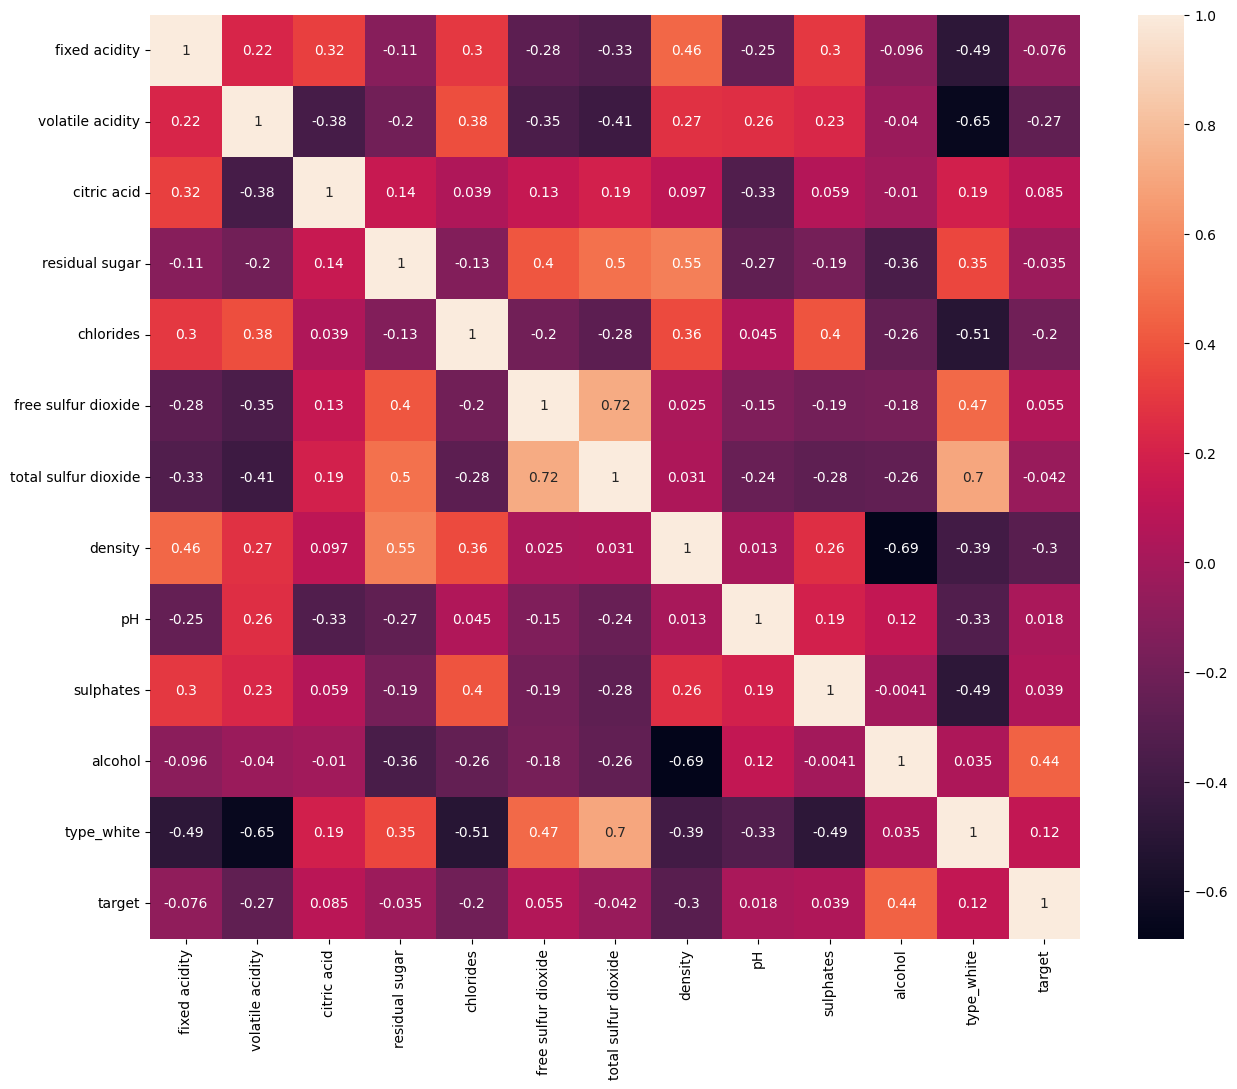

In [23]:
#Результат также не очень хороший, поэтому попробуем поработать над исходными признаками
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов
%matplotlib inline
data0 = pd.DataFrame(X)
data0['target'] = pd.DataFrame(Y)
corr = data0.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr,annot=True)
plt.show()

In [37]:
#Видим что зависимость слабая от признаков 'fixed acidity', 'citric acid', 'residual sugar', 'ph'
#Попробуем без них
import pandas as pd
data = pd.read_csv("/content/cleared_data.csv")
X = data.drop(columns='quality')
#Меняем категориальные признаки на колонки с бинарным значанием
X = pd.get_dummies(X.loc[:], columns=['type'])
X = X.drop(columns='type_red')
Y = data['quality']
X = X.drop(columns=['fixed acidity', 'citric acid', 'residual sugar', 'pH'])

In [41]:
X_train.head()

,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,density,sulphates,alcohol,type_white
3660,0.30,0.087,27.0,177.0,0.99438,0.50,9.8,1
4408,0.24,0.045,18.0,161.0,0.99196,0.53,11.2,1
5838,0.40,0.068,29.0,46.0,0.99430,0.60,12.2,0
3457,0.36,0.035,14.0,88.0,0.99031,0.27,13.0,1
176,0.27,0.050,64.0,227.0,0.99790,0.58,9.6,1


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [42]:

model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict_proba(X_test)
model.score(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4532095901005414

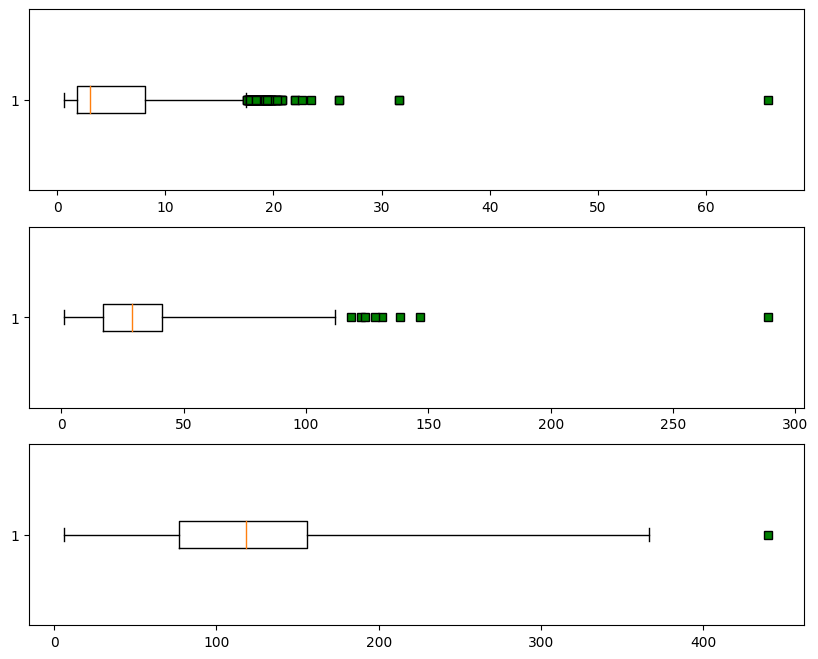

In [43]:
#Результаты не улучшаются, попробуем избавиться от выбросов.
red_circle = dict(markerfacecolor='g', marker='s') # выделим предполагаемые выбросы
fig, ax = plt.subplots(figsize=(10,8), nrows=3, )
ax[0].boxplot(data['residual sugar'], vert=False, flierprops=red_circle)
ax[1].boxplot(data['free sulfur dioxide'], vert=False, flierprops=red_circle, whis=3)
ax[2].boxplot(data['total sulfur dioxide'], vert=False, flierprops=red_circle, whis=3)
plt.show()

In [44]:
data = data.loc[data['residual sugar']<=20]
data = data.loc[data['free sulfur dioxide']<=130]
data = data.loc[data['total sulfur dioxide']<=400]


In [45]:
X = data.drop(columns='quality')
#Меняем категориальные признаки на колонки с бинарным значанием
X = pd.get_dummies(X.loc[:], columns=['type'])
X = X.drop(columns='type_red')
Y = data['quality']
X = X.drop(columns=['fixed acidity', 'citric acid', 'residual sugar', 'pH'])

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [47]:
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict_proba(X_test)
model.score(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.47633824670287045

In [48]:
from sklearn import ensemble
RF = ensemble.RandomForestClassifier()
RF.fit(X_train, Y_train)
RFpredict = RF.predict(X_test)
from sklearn import metrics as mtr
print (RF.score(X_test, Y_test))
print(mtr.classification_report(Y_test, RFpredict))

0.6966640806826998
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.88      0.20      0.33        35
           5       0.72      0.76      0.74       403
           6       0.68      0.78      0.73       580
           7       0.68      0.53      0.60       225
           8       0.93      0.33      0.49        39

    accuracy                           0.70      1289
   macro avg       0.65      0.43      0.48      1289
weighted avg       0.70      0.70      0.69      1289



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
data_w = data.loc[data['type']=="white"]
data_r = data.loc[data['type']=="red"]

In [56]:
X = data_w.drop(columns='quality')
#Меняем категориальные признаки на колонки с бинарным значанием
X = pd.get_dummies(X.loc[:], columns=['type'])
#X = X.drop_w(columns='type_red')
Y = data_w['quality']
#X = X.drop(columns=['fixed acidity', 'citric acid', 'residual sugar', 'pH'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict_proba(X_test)
model.score(X_test, Y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.4556701030927835

In [57]:
from sklearn import ensemble
RF = ensemble.RandomForestClassifier()
RF.fit(X_train, Y_train)
RFpredict = RF.predict(X_test)
from sklearn import metrics as mtr
print (RF.score(X_test, Y_test))
print(mtr.classification_report(Y_test, RFpredict))

0.6917525773195876
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.82      0.24      0.38        37
           5       0.69      0.70      0.70       275
           6       0.67      0.81      0.73       432
           7       0.75      0.58      0.65       187
           8       0.86      0.35      0.50        34
           9       0.00      0.00      0.00         1

    accuracy                           0.69       970
   macro avg       0.54      0.38      0.42       970
weighted avg       0.70      0.69      0.68       970



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#Подумал что наверное невозможно на маленьком датасете достигнуть моих изначальных 90%
#Посмотрел решение по данной задаче:
#https://machinelearningprojects.net/wine-quality-prediction/
#Там результат 83% - когда они делят на 2 класса - хорошие и плохие.
#Вероятно результат действительно будет лучше в случае бинарной классификации
#Мой результат 69% также приемлимый так как он решает задачу выставления оценки, а плохой и хороший
#это нечеткие субъективные понятия.